# Apply the model on evaluation set

## Import functions 

#### <span style="color:blue">*JUST RUN CELL*</span>


In [1]:
import os 
import sys
import numpy as np
#os.chdir(os.path.join("/home/datawork-osmose/",'osmoseNotebooks_v0','source'))

with open('path_codes.txt') as f:
    codes_path = f.readlines()[0]
with open('path_osmose_dataset.txt') as f:
    path_osmose_dataset = f.readlines()[0]
with open('path_osmose_analysisAI.txt') as f:
    path_osmose_analysisAI = f.readlines()[0]
    
sys.path.append(os.path.join(codes_path))
#os.chdir(os.path.join(codes_path))


from apply_model_on_eval_set import apply_model_on_eval_set_main , plot_examples_from_file_index
from use_network_functions import show_epoch_loss, set_epoch, load_model_hyperparameters, del_unused_epochs
from check_files_in_ai_folders import list_datasets, check_available_ai_tasks_benchmark_modeltrained


## Selection of task, benchmark and model

In [2]:
check_available_ai_tasks_benchmark_modeltrained(path_osmose_analysisAI)

/
Task_Glider_PBW_AnnotatorAnalysis/
    BM_merged15/
        models/
            m1/
    BM_EXP/
        models/
            m1/
    Comp_BM_curves/
    BM_merged6/
        models/
            m1/
    BM_merged2_2/
        models/
            m1/
    BM_merged2_3/
        models/
            m1/
    BM_merged2_4/
        models/
            m1/
    BM_merged2_5/
        models/
            m1/
    BM_merged2_6/
        models/
            m1/
    BM_merged2_7/
        models/
            m1/
    BM_merged2_8/
        models/
            m1/
    BM_merged8/
        models/
            m1/
    BM_merged10/
        models/
            m1/
    BM_merged12/
        models/
            m1/
    BM_merged14/
        models/
            m1/
    BM_merged2_9/
        models/
            m1/
    BM_merged2_10/
        models/
            m1/
    WeakLabelling_AllAnnotation/
        models/
            m1/
    BM_AN_Nassau/
        models/
            m1/
    BM_AN_Shanghai/
        models/
     

#### <span style="color:red">*Select your task and benchmark among those already created*</span>

Ex : 
- ``Task_ID`` = 'TaskTEST1'
- ``BM_Name`` = 'BMTEST1_1'
- ``VersionName`` = 'model1' 

In [3]:
Task_ID = 'task_example_osmose_user'
BM_Name = 'bm_example_osmose_user'

model_name = 'm1'

## Print Parameters

Nb : mettre ici le choix de l'epoch à conserver !

#### <span style="color:blue">*JUST RUN CELL*</span>

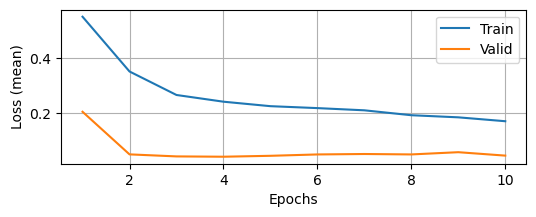

In [4]:
show_epoch_loss(path_osmose_analysisAI, Task_ID, BM_Name, model_name)

In [5]:
ID_epoch_for_evaluation = 4

In [6]:
set_epoch(path_osmose_analysisAI, Task_ID, BM_Name, model_name, ID_epoch_for_evaluation)

Sub-states already deleted !


In [7]:
del_unused_epochs(path_osmose_analysisAI, Task_ID, BM_Name, model_name)

Done : all other sub-states removed


In [4]:
parameters = load_model_hyperparameters(path_osmose_analysisAI, Task_ID, BM_Name, model_name)

for item in list(parameters.keys()):
    print(item, ' : ', parameters[item])


TrainsetRatio  :  0.9
batch_size  :  10
learning_rate  :  0.0001
num_epochs  :  10
shuffle  :  True
use_pretrained  :  False
input_data_format  :  audio
nfft  :  [512, 512, 512]
window_size  :  [512, 512, 512]
overlap  :  [92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92]
dynamic_min  :  [-20, -20, -20]
dynamic_max  :  [20, 20, 20]
scaling  :  ['spectrum', 'spectrum', 'spectrum']
num_classes  :  1
sample_rate  :  [250 250 250]
dataset_ID_tab  :  ['BlueFinLibrary_ElephantIsland2013Aural'
 'BlueFinLibrary_ElephantIsland2014' 'BlueFinLibrary_RossSea2014']
Task_ID  :  task_example_osmose_user
BM_Name  :  bm_example_osmose_user
SplitName  :  split_for_eval_small
model_name  :  m1
architecture  :  CNN3_FC3
index_dataset  :  2


## Launch Evaluation

#### <span style="color:blue">*JUST RUN CELL*</span>

Nb : LabelsList, labels and outputs are returned in case you want to apply your own computation metrics

Nb : new release : add an output_list to select wich merics(s) use

Checking paths and loadings parameters and model ...
Done
Applying model on evaluation set ...


100%|██████████| 20167/20167 [08:22<00:00, 40.10it/s] 


Done


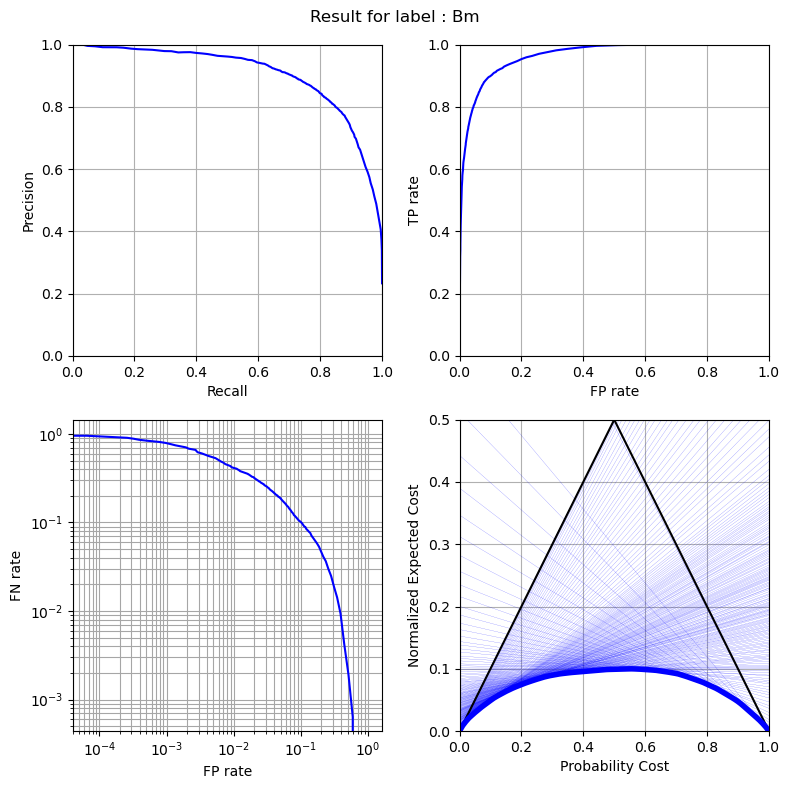

In [9]:
LabelsList, labels, outputs, datasets, filename = apply_model_on_eval_set_main(path_osmose_dataset, path_osmose_analysisAI, Task_ID, BM_Name, model_name)

#### <span style="color:blue">*Example of possibilities to observe results :*</span>

ROC curve, PR curve and AUC by datasets :

BlueFinLibrary_ElephantIsland2013Aural: 100%|██████████| 20167/20167 [00:00<00:00, 130569.02it/s]


BlueFinLibrary_ElephantIsland2013Aural : 
NB files :  6836
AUC :  0.9391557726577415


BlueFinLibrary_ElephantIsland2014: 100%|██████████| 20167/20167 [00:00<00:00, 153802.36it/s]


BlueFinLibrary_ElephantIsland2014 : 
NB files :  7113
AUC :  0.9425464963504603


BlueFinLibrary_RossSea2014: 100%|██████████| 20167/20167 [00:00<00:00, 163729.70it/s]


BlueFinLibrary_RossSea2014 : 
NB files :  6218
AUC :  0.9915143369175626


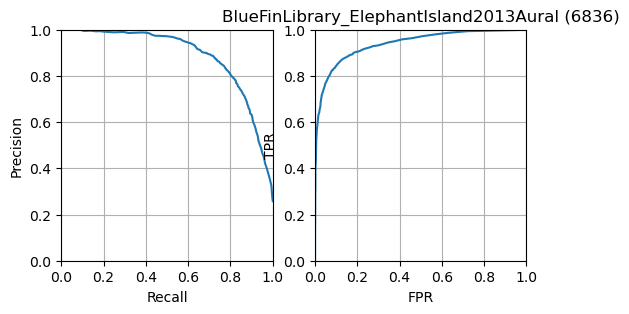

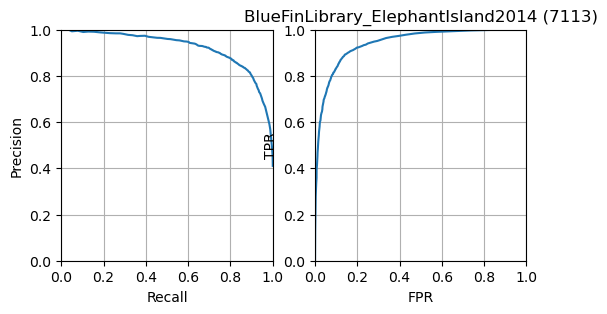

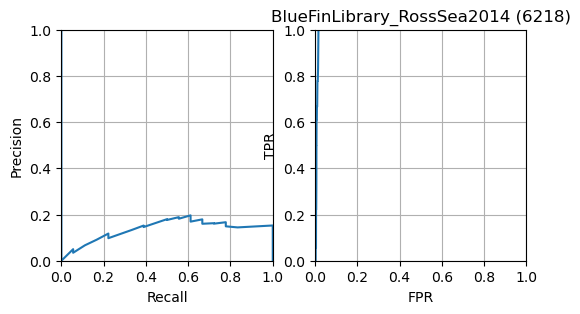

In [10]:
import matplotlib.pyplot as plt
from evaluation_metrics import ComputeEvaluationMetrics, plot_PR_curve, plot_ROC_curve, plot_DET_curve, plot_COST_curve, plot_4_curves
from tqdm import tqdm
import sklearn
dataset_ID_tab = parameters['dataset_ID_tab']

for dataset in (dataset_ID_tab):
    outputs_d = np.array([])
    labels_d = np.array([])
    for i in tqdm(range(len(datasets)), desc=dataset):
        if datasets[i] == dataset:
            outputs_d = np.concatenate((outputs_d, outputs[i]))
            labels_d = np.concatenate((labels_d, labels[i]))
    
    outputs_d = outputs_d[:, np.newaxis]
    labels_d = labels_d[:, np.newaxis]
    
    Recall, Precision, FP_rate, TP_rate, FN_rate, NormalizedExpectedCost, ProbabilityCost, threshold_array = ComputeEvaluationMetrics(LabelsList, labels_d, outputs_d)
    AUC = sklearn.metrics.auc(FP_rate, TP_rate)
    print(dataset + ' : ')
    print('NB files : ',len(outputs_d))
    print('AUC : ',AUC)
    
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.plot(Recall, Precision)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.subplot(1,2,2)
    plt.plot(FP_rate, TP_rate)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(dataset + ' ('+str(len(outputs_d))+')')
    plt.grid()
    plt.tight_layout()

Comparison Output vs Label per file :

(2000.0, 2200.0)

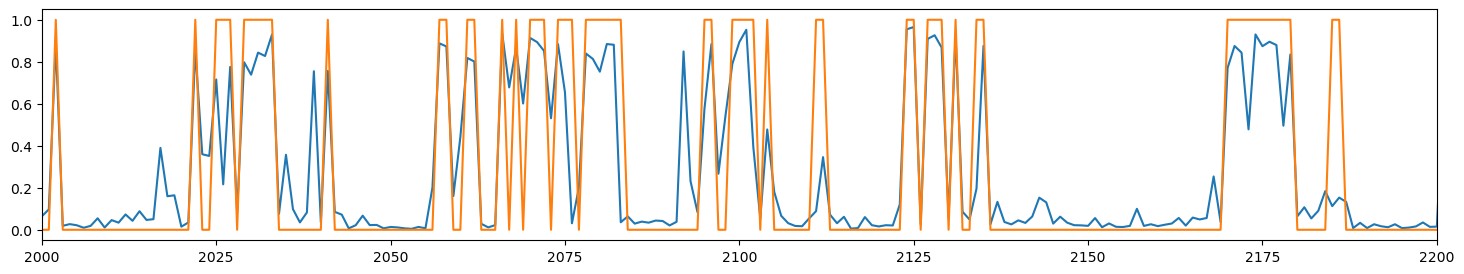

In [15]:
plt.figure(figsize=(18,3))
plt.plot(outputs)
plt.plot(labels)
k = 2000
plt.xlim([0+k,200+k])

Plot example from file index : 

Checking paths and loadings parameters and model ...
Done


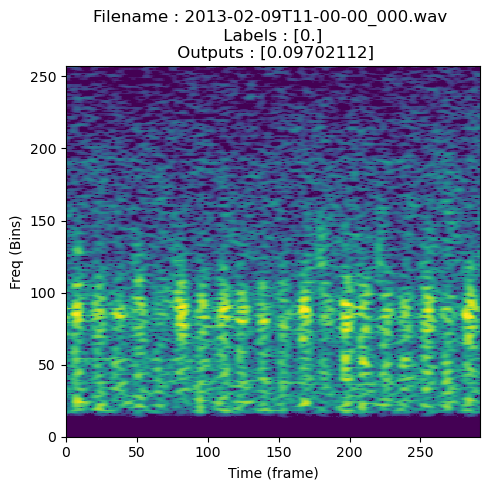

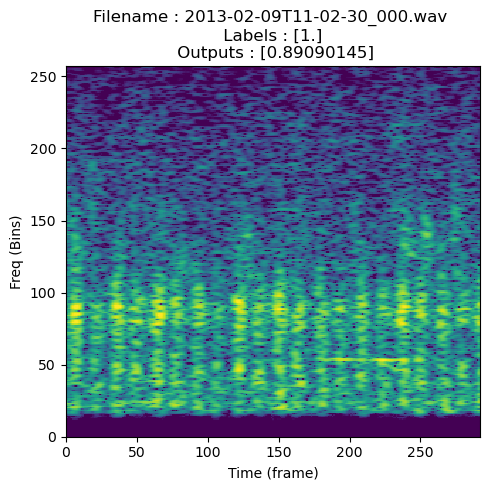

In [5]:
index_to_plot = [2001, 2002]
plot_examples_from_file_index(path_osmose_dataset, path_osmose_analysisAI, Task_ID, BM_Name, model_name, index_to_plot)